## Data Preprocessing - 2

Import statements

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [191]:
c_fraud_df = pd.read_csv("corrected_names.csv")
c_fraud_df.head()

,Unnamed: 0,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis
0,0,+1-602-484-3039,05:06:43,normal,That are you doing?,Neutral
1,1,+1-703-942-8189,15:08:08,Scam,YOU HAVE WON! Is a valued Vodafone customer ou...,Positive
2,2,+1-901-383-7693,03:36:17,normal,"K, Met me see.",Positive
3,3,+1-602-747-4851,10:12:14,normal,"He will, you guns close?",Neutral
4,4,+1-214-359-8191,09:42:00,normal,Oh oh... Men mud change plan liar... To back h...,Neutral


In [192]:
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11854 non-null  int64 
 1   Caller Number       11854 non-null  object
 2   Call Time           11854 non-null  object
 3   Call Type           11854 non-null  object
 4   Conversation        11854 non-null  object
 5   Sentiment Analysis  11854 non-null  object
dtypes: int64(1), object(5)
memory usage: 555.8+ KB


Converting Call time to time series data


In [193]:
c_fraud_df['Call Time'] = pd.to_datetime(c_fraud_df['Call Time'], format='%H:%M:%S')

In [194]:
c_fraud_df.dtypes

Unnamed: 0                     int64
Caller Number                 object
Call Time             datetime64[ns]
Call Type                     object
Conversation                  object
Sentiment Analysis            object
dtype: object

In [195]:
c_fraud_df.describe(include='all')

,Unnamed: 0,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis
count,11854.00000,11854,11854,11854,11854,11854
unique,NaN,11854,NaN,3,5601,3
top,NaN,+1-808-946-5691,NaN,normal,"Sorry, I'll call later",Neutral
freq,NaN,1,NaN,10578,50,5958
mean,5926.50000,NaN,1900-01-01 11:59:08.154546688,NaN,NaN,NaN
min,0.00000,NaN,1900-01-01 00:00:08,NaN,NaN,NaN
25%,2963.25000,NaN,1900-01-01 06:01:12.750000128,NaN,NaN,NaN
50%,5926.50000,NaN,1900-01-01 12:05:05.500000,NaN,NaN,NaN
75%,8889.75000,NaN,1900-01-01 17:55:05.750000128,NaN,NaN,NaN
max,11853.00000,NaN,1900-01-01 23:59:59,NaN,NaN,NaN


In [196]:
value_counts_1 = c_fraud_df["Call Type"].value_counts()

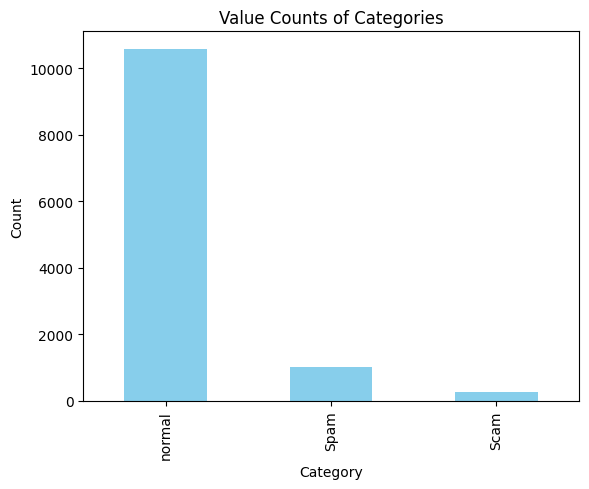

In [197]:
value_counts_1.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()

#It is very much clear from the below graph that there exists a class imbalance. Therefore there is a necessity for Oversampling.

In [198]:
value_counts_2 = c_fraud_df['Sentiment Analysis'].value_counts()

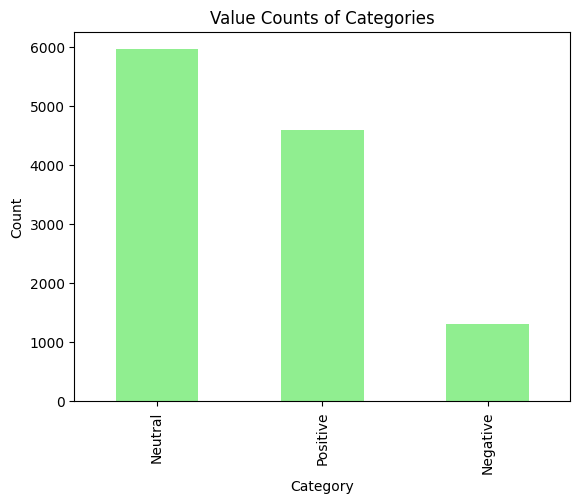

In [199]:
value_counts_2.plot(kind='bar', color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()

#From this graph, it is pretty clear that sentiment analysis has less correlation than what expected

Label Encoding

In [200]:
#Initial encoding just for examining data
c_fraud_df.loc[c_fraud_df['Call Type']=='normal','Call Type'] = 0
c_fraud_df.loc[c_fraud_df['Call Type']=='Spam','Call Type'] = 1
c_fraud_df.loc[c_fraud_df['Call Type']=='Scam','Call Type'] = 2

# le = LabelEncoder()
# c_fraud_df['Sentiment Analysis'] = le.fit_transform(c_fraud_df["Sentiment Analysis"])
# c_fraud_df
#LabelEncoding defines an order i.e 2 is high and 1 is low sort of. Therefore use manual encoding procedure

c_fraud_df.loc[c_fraud_df['Sentiment Analysis']=='Neutral','Sentiment Analysis'] = 1
c_fraud_df.loc[c_fraud_df['Sentiment Analysis']=='Positive','Sentiment Analysis'] = 2
c_fraud_df.loc[c_fraud_df['Sentiment Analysis']=='Negative','Sentiment Analysis'] = 0

Encoding format For call type:

Normal = 0

Spam = 1

Scam = 2


Encoding format for Sentiment analysis

Negative = 0

Neutral = 1

Positive = 2

Drop unnecessary columns

In [201]:
c_fraud_df = c_fraud_df.drop('Unnamed: 0', axis=1)


In [202]:
c_fraud_df.head()

,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis
0,+1-602-484-3039,1900-01-01 05:06:43,0,That are you doing?,1
1,+1-703-942-8189,1900-01-01 15:08:08,2,YOU HAVE WON! Is a valued Vodafone customer ou...,2
2,+1-901-383-7693,1900-01-01 03:36:17,0,"K, Met me see.",2
3,+1-602-747-4851,1900-01-01 10:12:14,0,"He will, you guns close?",1
4,+1-214-359-8191,1900-01-01 09:42:00,0,Oh oh... Men mud change plan liar... To back h...,1


In [203]:
c_fraud_df.describe(include='all')

,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis
count,11854,11854,11854.0,11854,11854.0
unique,11854,NaN,3.0,5601,3.0
top,+1-808-946-5691,NaN,0.0,"Sorry, I'll call later",1.0
freq,1,NaN,10578.0,50,5958.0
mean,NaN,1900-01-01 11:59:08.154546688,NaN,NaN,NaN
min,NaN,1900-01-01 00:00:08,NaN,NaN,NaN
25%,NaN,1900-01-01 06:01:12.750000128,NaN,NaN,NaN
50%,NaN,1900-01-01 12:05:05.500000,NaN,NaN,NaN
75%,NaN,1900-01-01 17:55:05.750000128,NaN,NaN,NaN
max,NaN,1900-01-01 23:59:59,NaN,NaN,NaN


Plotting Call Time Histogram

In [204]:
print(type(c_fraud_df['Call Time'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [205]:
c_fraud_df['Hour'] = c_fraud_df['Call Time'].dt.hour
c_fraud_df.head()

,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis,Hour
0,+1-602-484-3039,1900-01-01 05:06:43,0,That are you doing?,1,5
1,+1-703-942-8189,1900-01-01 15:08:08,2,YOU HAVE WON! Is a valued Vodafone customer ou...,2,15
2,+1-901-383-7693,1900-01-01 03:36:17,0,"K, Met me see.",2,3
3,+1-602-747-4851,1900-01-01 10:12:14,0,"He will, you guns close?",1,10
4,+1-214-359-8191,1900-01-01 09:42:00,0,Oh oh... Men mud change plan liar... To back h...,1,9


Checking Correlations and plotting more graphs

In [206]:
columns_to_exclude = ['Caller Number','Call Time','Conversation']
correlations = c_fraud_df.drop(columns=columns_to_exclude).corr()
correlations['Call Type']

Call Type             1.000000
Sentiment Analysis    0.080397
Hour                 -0.000198
Name: Call Type, dtype: float64

Plotting Spam and Scam calls against hour and sentiments to check correlation

In [212]:
spam_calls = c_fraud_df[c_fraud_df['Call Type'] == 1]
spam_calls.head()

,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis,Hour
8,+1-702-596-9537,1900-01-01 20:10:09,1,Sunshine Vols. To claim or med holiday send a ...,1,20
13,+1-702-264-2497,1900-01-01 03:12:40,1,More people are digging in your area now. All ...,2,3
15,+1-214-303-7293,1900-01-01 19:00:44,1,LORD of THE RINGS:RETURN of THE KING in store ...,2,19
16,+1-702-919-9453,1900-01-01 05:42:08,1,"Hello sir, I am speaking from Paytm. Have you...",1,5
37,+1-808-818-4365,1900-01-01 10:50:34,1,Today's Offer! Claim your £150 worth of discou...,2,10


In [213]:
scam_calls = c_fraud_df[c_fraud_df['Call Type'] == 2]
scam_calls.head()

,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis,Hour
1,+1-703-942-8189,1900-01-01 15:08:08,2,YOU HAVE WON! Is a valued Vodafone customer ou...,2,15
65,+1-901-433-9219,1900-01-01 14:44:12,2,URGENT! He are trying to contact U. Days draw ...,1,14
86,+1-404-415-8322,1900-01-01 10:47:00,2,you won a lucky draw for shopping on an amazon...,2,10
183,+1-303-294-1068,1900-01-01 10:14:22,2,+123 Congratulations - in this week's competit...,1,10
278,+1-415-425-4889,1900-01-01 23:29:46,2,Your Mobile To. was awarded 2000 INR Bonus Tal...,1,23


In [221]:
combined_df = pd.concat([scam_calls, spam_calls], ignore_index=True)
shuffled_df = combined_df.sample(frac=1,random_state=40).reset_index(drop=True)
shuffled_df.head()

,Caller Number,Call Time,Call Type,Conversation,Sentiment Analysis,Hour
0,+1-404-403-1752,1900-01-01 11:07:05,1,U 447801259231 have a secret admirer who is lo...,0,11
1,+1-305-750-8919,1900-01-01 11:11:48,1,"hello sir, to get a 500 INR voucher for play m...",1,11
2,+1-602-653-2477,1900-01-01 19:12:30,2,"Thank you, winner notified by sums. Good Luck!...",2,19
3,+1-703-544-7776,1900-01-01 05:15:53,2,"Is a valued customer, I am pleased to advise y...",2,5
4,+1-702-204-4045,1900-01-01 10:01:17,1,Have yourself the stress. Of the person has a ...,1,10


In [224]:
scam_counts = shuffled_df['Hour'].value_counts().sort_index()
scam_counts.head()

Hour
0    59
1    48
2    53
3    55
4    45
Name: count, dtype: int64

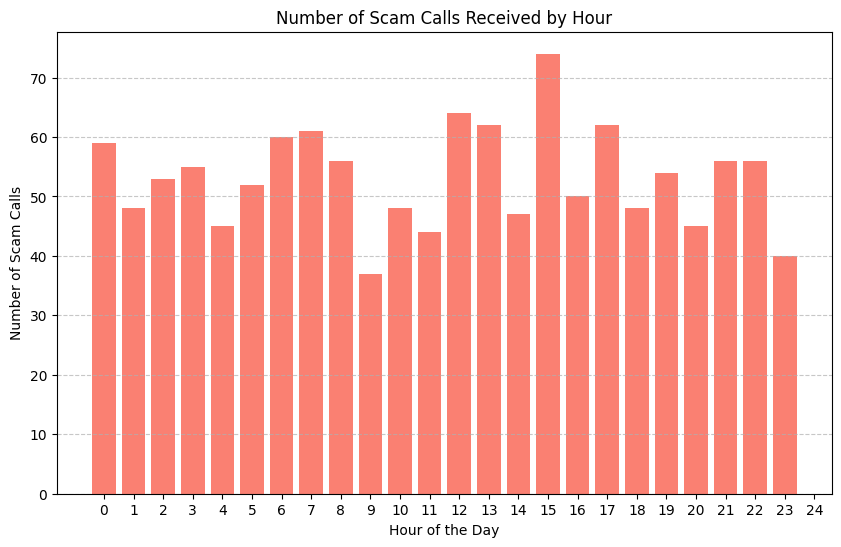

In [229]:
plt.figure(figsize=(10, 6))
plt.bar(scam_counts.index, scam_counts.values, color='#FA8072')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Scam Calls')
plt.title('Number of Scam Calls Received by Hour')
plt.xticks(range(0, 25))  # Show all hours from 0 to 24
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#This graph clearly shows that hour or time itself has no significance as scam and spam calls are evenly distributed

In [226]:
scam_sentiments = shuffled_df['Sentiment Analysis'].value_counts().sort_index()
scam_sentiments.head()

Sentiment Analysis
0     66
1    594
2    616
Name: count, dtype: int64

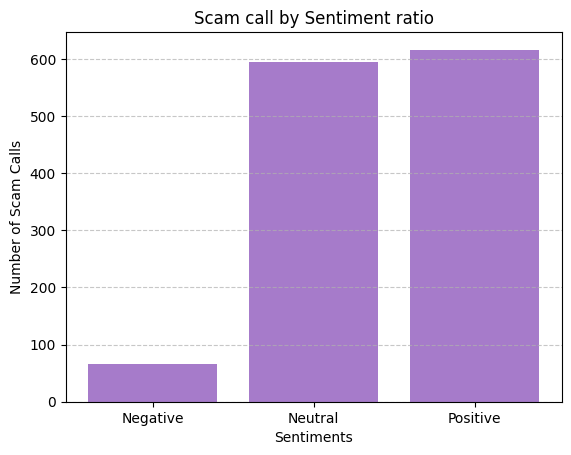

In [ ]:
plt.bar(scam_sentiments.index, scam_sentiments.values, color='#A67BCA')
plt.xlabel('Sentiments')
plt.ylabel('Number of Scam Calls')
plt.title('Scam call by Sentiment ratio')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Therefore it can be said that most of the scam calls or spam calls engage in neutral or positive sentiments and don't use negative sentiment
#Therefore sentiment analysis row is also loosely correlated